In [47]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [48]:
# Save file path to variable
multi_city = Path("../Resources/Multi_City_Airport_Markets.csv")
multi_city_df = pd.read_csv(multi_city)

# Read with Pandas
multi_city_df.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2018,4,30257,30852,"Albany, NY","Washington, DC (Metropolitan Area)",10257,11278,ALB,...,190.81,AA,0.9775,190.74,AA,0.9775,190.74,NaN,NaN,201841025711278ALBDCA
1,Table1a,2018,4,30257,32575,"Albany, NY","Los Angeles, CA (Metropolitan Area)",10257,14908,ALB,...,363.14,UA,0.4599,331.00,UA,0.4599,331.00,NaN,NaN,201841025714908ALBSNA
2,Table1a,2018,4,30257,33195,"Albany, NY","Tampa, FL (Metropolitan Area)",10257,14112,ALB,...,100.78,G4,1.0000,100.78,G4,1.0000,100.78,NaN,NaN,201841025714112ALBPIE
3,Table1a,2018,4,30257,30852,"Albany, NY","Washington, DC (Metropolitan Area)",10257,12264,ALB,...,184.86,UA,0.9854,184.48,UA,0.9854,184.48,NaN,NaN,201841025712264ALBIAD
4,Table1a,2018,4,30257,32467,"Albany, NY","Miami, FL (Metropolitan Area)",10257,11697,ALB,...,188.20,B6,0.6067,185.63,B6,0.6067,185.63,NaN,NaN,201841025711697ALBFLL


In [49]:
#renamed
renamed_multi_city = multi_city_df.rename(columns ={"Year": "Year",
                                                      "quarter": "Quarter",
                                                      "city1": "City1",
                                                      "city2": "City2",
                                                      "airport_1": "Airport1",
                                                      "airport_2": "Airport2",
                                                      "nsmiles" : "Non_stop_Miles",
                                                      "passengers": "Passengers",
                                                      "fare" : "Overal_Average_Fare",
                                                      "carrier_lg": "Carrier_has_higest_fare_A",
                                                      "large_ms": "Market_share_of_A",
                                                      "fare_lg": "Average_fare_of_A",
                                                      "carrier_low": "Carrier_has_lowest_fare_B",
                                                      "lf_ms": "Market_share_of_B",
                                                      "fare_low": "Average_fare_of_B"})
renamed_multi_city_df = pd.DataFrame (renamed_multi_city)
renamed_multi_city_df.head()

,tbl,Year,Quarter,citymarketid_1,citymarketid_2,City1,City2,airportid_1,airportid_2,Airport1,...,Overal_Average_Fare,Carrier_has_higest_fare_A,Market_share_of_A,Average_fare_of_A,Carrier_has_lowest_fare_B,Market_share_of_B,Average_fare_of_B,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2018,4,30257,30852,"Albany, NY","Washington, DC (Metropolitan Area)",10257,11278,ALB,...,190.81,AA,0.9775,190.74,AA,0.9775,190.74,NaN,NaN,201841025711278ALBDCA
1,Table1a,2018,4,30257,32575,"Albany, NY","Los Angeles, CA (Metropolitan Area)",10257,14908,ALB,...,363.14,UA,0.4599,331.00,UA,0.4599,331.00,NaN,NaN,201841025714908ALBSNA
2,Table1a,2018,4,30257,33195,"Albany, NY","Tampa, FL (Metropolitan Area)",10257,14112,ALB,...,100.78,G4,1.0000,100.78,G4,1.0000,100.78,NaN,NaN,201841025714112ALBPIE
3,Table1a,2018,4,30257,30852,"Albany, NY","Washington, DC (Metropolitan Area)",10257,12264,ALB,...,184.86,UA,0.9854,184.48,UA,0.9854,184.48,NaN,NaN,201841025712264ALBIAD
4,Table1a,2018,4,30257,32467,"Albany, NY","Miami, FL (Metropolitan Area)",10257,11697,ALB,...,188.20,B6,0.6067,185.63,B6,0.6067,185.63,NaN,NaN,201841025711697ALBFLL


In [50]:
#filter
reduced_df = renamed_multi_city_df.loc[
    (renamed_multi_city_df["City1"] == "Los Angeles, CA (Metropolitan Area)") &
    (renamed_multi_city_df["City2"].isin(["Tampa, FL (Metropolitan Area)", "Washington, DC (Metropolitan Area)", "Seattle, WA"])),
    ["Year","Quarter", "City1", "City2", "Airport1", "Airport2", "Non_stop_Miles", "Passengers", "Overal_Average_Fare"]
]
reduced_df.head()

,Year,Quarter,City1,City2,Airport1,Airport2,Non_stop_Miles,Passengers,Overal_Average_Fare
1285,2018,4,"Los Angeles, CA (Metropolitan Area)","Tampa, FL (Metropolitan Area)",LAX,TPA,2158,792,296.07
1292,2018,4,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",LAX,SEA,978,4151,177.68
1319,2018,4,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",LAX,IAD,2329,2059,310.32
1324,2018,4,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",LAX,DCA,2329,1388,305.38
1325,2018,4,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",LAX,BWI,2329,1605,221.51


In [59]:
miles_destination = reduced_df.groupby(["City2"])["Non_stop_Miles"].unique().str[0]
miles_destination

City2
Seattle, WA                            978
Tampa, FL (Metropolitan Area)         2158
Washington, DC (Metropolitan Area)    2329
Name: Non_stop_Miles, dtype: int64

In [52]:
avg_passengers = reduced_df.groupby(["City2"])["Passengers"].mean().astype(int)
avg_passengers

City2
Seattle, WA                           1697
Tampa, FL (Metropolitan Area)          175
Washington, DC (Metropolitan Area)     374
Name: Passengers, dtype: int32

In [53]:
avg_overall_fare = reduced_df.groupby(["City2"])["Overal_Average_Fare"].mean().round(2)
avg_overall_fare

City2
Seattle, WA                           160.13
Tampa, FL (Metropolitan Area)         309.76
Washington, DC (Metropolitan Area)    303.20
Name: Overal_Average_Fare, dtype: float64

In [60]:
itineary_summary = pd.DataFrame({"Miles to Destination":miles_destination,
                                 "Average Passengers":avg_passengers,
                                 "Average Overall Fares":avg_overall_fare})
itineary_summary

,Miles to Destination,Average Passengers,Average Overall Fares
City2,,,
"Seattle, WA",978,1697,160.13
"Tampa, FL (Metropolitan Area)",2158,175,309.76
"Washington, DC (Metropolitan Area)",2329,374,303.20


In [55]:
# Save file path to variable
table2 = Path("../Resources/Table_2-City_Pair_Markets_Summary_By_City.csv")
table2_df = pd.read_csv(table2)

# Read with Pandas
table2_df.head()

,tbl,Year,quarter,citymarketid,city,markets,cur_passengers,cur_fare,cur_yield,distance,ly_passengers,ly_fare,ly_yield,ly_distance,Geocoded_City,tbl2pk
0,Table 2,2018,4,35412,"Knoxville, TN",6,160310,185.02,31.28,591.6,140460,176.49,29.32,601.9,NaN,2018435412
1,Table 2,2018,4,35096,"Syracuse, NY",7,188720,195.20,26.05,749.2,182170,198.37,26.83,739.3,NaN,2018435096
2,Table 2,2018,4,34685,"Savannah, GA",4,192840,184.65,24.85,743.1,179110,188.61,25.01,754.0,NaN,2018434685
3,Table 2,2018,4,34653,"Tulsa, OK",11,311680,217.61,26.26,828.8,307590,211.03,25.87,815.8,NaN,2018434653
4,Table 2,2018,4,34614,"Salt Lake City, UT",32,2272030,212.71,20.56,1034.6,2193920,200.75,19.63,1022.7,NaN,2018434614


In [56]:
#Rename the DataFrame
renamed_table2 = table2_df.rename(columns ={"Year":"Year",
                                    "quarter":"Quarter",
                                    "city":"City",
                                    "markets":"Markets",
                                    "cur_passengers":"Current Passengers"
                                              })
renamed_table2_df = pd.DataFrame(renamed_table2)
renamed_table2_df.head()

,tbl,Year,Quarter,citymarketid,City,Markets,Current Passengers,cur_fare,cur_yield,distance,ly_passengers,ly_fare,ly_yield,ly_distance,Geocoded_City,tbl2pk
0,Table 2,2018,4,35412,"Knoxville, TN",6,160310,185.02,31.28,591.6,140460,176.49,29.32,601.9,NaN,2018435412
1,Table 2,2018,4,35096,"Syracuse, NY",7,188720,195.20,26.05,749.2,182170,198.37,26.83,739.3,NaN,2018435096
2,Table 2,2018,4,34685,"Savannah, GA",4,192840,184.65,24.85,743.1,179110,188.61,25.01,754.0,NaN,2018434685
3,Table 2,2018,4,34653,"Tulsa, OK",11,311680,217.61,26.26,828.8,307590,211.03,25.87,815.8,NaN,2018434653
4,Table 2,2018,4,34614,"Salt Lake City, UT",32,2272030,212.71,20.56,1034.6,2193920,200.75,19.63,1022.7,NaN,2018434614


In [57]:
# Reduced table from LA to Tampa, Washington DC, and Seattle
reduced_table2_df = renamed_table2_df.loc[
    (renamed_table2_df["City"].isin(["Los Angeles, CA (Metropolitan Area)","Tampa, FL (Metropolitan Area)", "Washington, DC (Metropolitan Area)", "Seattle, WA"])),
    ["Year","Quarter", "City", "Markets", "Current Passengers"]]
reduced_table2_df.head(50)

,Year,Quarter,City,Markets,Current Passengers
24,2018,4,"Tampa, FL (Metropolitan Area)",48,3535230
30,2018,4,"Los Angeles, CA (Metropolitan Area)",66,14222520
51,2018,4,"Washington, DC (Metropolitan Area)",69,9517990
59,2018,4,"Seattle, WA",51,5466110
92,2018,3,"Tampa, FL (Metropolitan Area)",44,3105890
98,2018,3,"Los Angeles, CA (Metropolitan Area)",70,14414490
120,2018,3,"Washington, DC (Metropolitan Area)",72,9275150
129,2018,3,"Seattle, WA",54,6421600
165,2018,2,"Tampa, FL (Metropolitan Area)",46,3633770
171,2018,2,"Los Angeles, CA (Metropolitan Area)",66,14562180


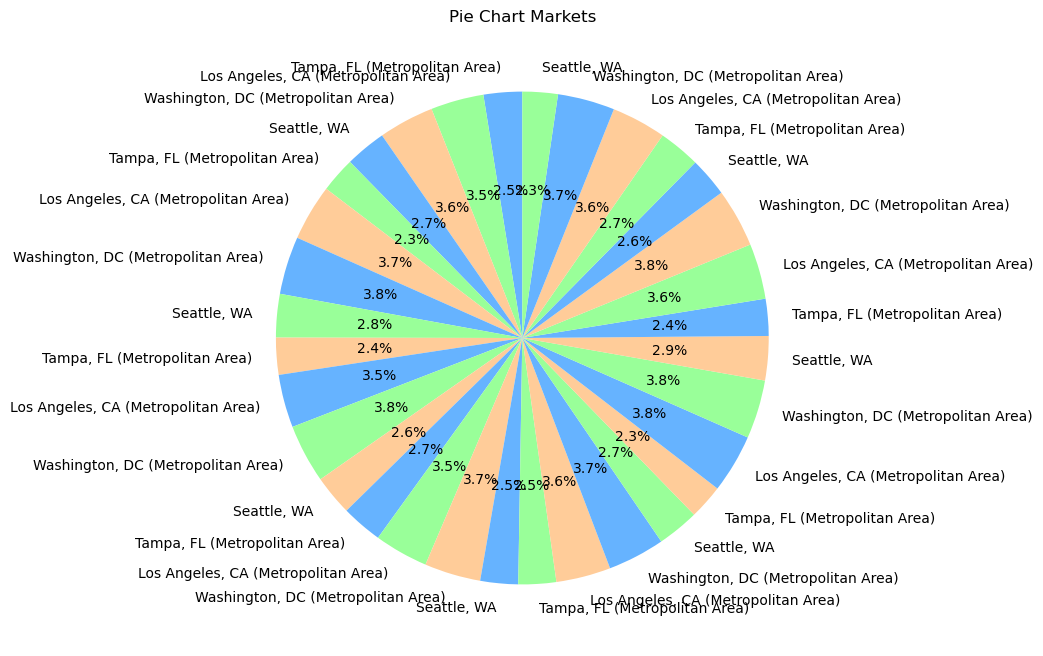

In [61]:
plt.figure(figsize=(8, 8))
plt.pie(reduced_table2_df['Markets'], labels=reduced_table2_df['City'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Pie Chart Markets')
plt.show()